<a href="https://colab.research.google.com/github/FaldoFajri/padang_food_image_classification/blob/main/padang_food_image_classification_using_model_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Padang Food Image Classification

Padang cuisine is food that comes from the Minangkabau area, West Sumatra, Indonesian. So far, Padang cuisine still has loyal fans in West Sumatra and throughout Indonesia. Padang cuisine is cooked using a lot of herbs and spices, which makes this dish much loved by everyone. Not only that but internationally, Padang cuisine is famous for its rendang which has been named the most delicious food in the world. Rendang was ranked first as the most delicious food in the world version of CNN International's 50 Most Delicious Foods version. For eight times in a row, rendang continued to stay in first place from 2011 to 2019.

This dataset contains images of the most popular Padang cuisine, to be more specific:

1. Beef rendang
2. Chicken Pop
3. Fried Chicken
4. Dendeng Batokok
5. Fish Curry
6. Tambusu Curry
7. Tunjang Curry
8. Balado Egg
9. Padang Omelette

Link Dataset : https://doi.org/10.34740/KAGGLE/DSV/4053613

# Import dataset from Kaggle

In [ ]:
! pip install opendatasets --quiet

Before downloading the dataset, enter your username and kaggle account key, the method can be seen in http://bit.ly/kaggle-creds

In [ ]:
import opendatasets as od 
dataset_url = 'https://www.kaggle.com/datasets/faldoae/padangfood'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: faldoae
Your Kaggle Key: ··········


100%|██████████| 114M/114M [00:03<00:00, 39.6MB/s]


In [ ]:
import numpy as np
import pandas as pd 

import os

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

# Splitting Dataset

In [ ]:
#create a new folder that is used to enter the results of the split dataset

!mkdir datasplit

In [ ]:
#create variables by defining the location of the raw dataset folder and the splitting dataset folder

dataraw = '/content/padangfood/dataset_padang_food'
datasplit = '/content/datasplit'

In [ ]:
#dataset splitting process with a ratio of 60% train data, 30% validation data and 10% test data

!pip install split-folders #install 
import splitfolders
splitfolders.ratio(dataraw, output=datasplit, seed=1337, ratio=(.6,.3,.1),group_prefix=None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 993 files [00:00, 3284.59 files/s]


In [ ]:
test_dir = "./datasplit/test"
train_dir = "./datasplit/train"
val_dir = "./datasplit/val"

# Import Machine Learning Model VGG16

In [ ]:
#DISINI SAYA MENGGUNAKAN MODEL VGG16

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout = layers.Dropout(0.5)
prediction_layer = layers.Dense(9, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout,
    prediction_layer
])

# Augmentation Data

In [ ]:
image_shape = (224,224,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 591 images belonging to 9 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 293 images belonging to 9 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 109 images belonging to 9 classes.


# Train Machine Learning Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00001),
              metrics=['accuracy'])

results = model.fit(train_image_gen,epochs=160, validation_data=val_image_gen)

Epoch 1/160
19/19 [==============================] - 39s 1s/step - loss: 2.4835 - accuracy: 0.1083 - val_loss: 2.1298 - val_accuracy: 0.1945
Epoch 2/160
19/19 [==============================] - 23s 1s/step - loss: 2.2829 - accuracy: 0.1709 - val_loss: 2.0077 - val_accuracy: 0.3003
Epoch 3/160
19/19 [==============================] - 16s 839ms/step - loss: 2.1645 - accuracy: 0.2166 - val_loss: 1.8918 - val_accuracy: 0.3754
Epoch 4/160
19/19 [==============================] - 16s 829ms/step - loss: 1.9651 - accuracy: 0.2775 - val_loss: 1.7938 - val_accuracy: 0.4198
Epoch 5/160
19/19 [==============================] - 16s 837ms/step - loss: 1.8341 - accuracy: 0.3401 - val_loss: 1.7372 - val_accuracy: 0.4471
Epoch 6/160
19/19 [==============================] - 17s 893ms/step - loss: 1.7069 - accuracy: 0.3909 - val_loss: 1.6348 - val_accuracy: 0.5290
Epoch 7/160
19/19 [==============================] - 16s 845ms/step - loss: 1.6082 - accuracy: 0.4264 - val_loss: 1.5825 - val_accuracy: 0.532

The results of the training model are stored in the dataframe

In [ ]:
plot_df = pd.DataFrame(model.history.history)
plot_df

,loss,accuracy,val_loss,val_accuracy
0,2.483545,0.108291,2.129846,0.194539
1,2.282851,0.170897,2.007663,0.300341
2,2.164547,0.216582,1.891778,0.375427
3,1.965106,0.277496,1.793824,0.419795
4,1.834131,0.340102,1.737200,0.447099
...,...,...,...,...
155,0.136893,0.976311,0.687109,0.774744
156,0.137068,0.978003,0.741318,0.744027
157,0.117092,0.983080,0.703900,0.747440
158,0.114410,0.984772,0.696882,0.778157


Plotting the results of the training model

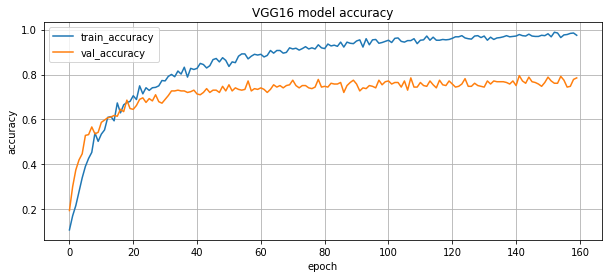

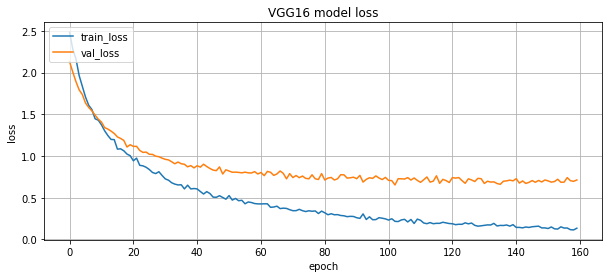

In [ ]:
# Membuat plot akurasi model
plt.figure(figsize=(10,4))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model
plt.figure(figsize=(10,4))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
#we can test our model on testing data
results = model.evaluate(test_image_gen, verbose=0)

print("Test Accuracy : {:.2f}%".format(results[1] * 100))
print("    Test Loss : {:.2f}%".format(results[0] * 100))

Test Accuracy : 84.40%
    Test Loss : 48.97%


# Classification Metrics

In [ ]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions,target_names=['ayam_goreng', 'ayam_pop', 'daging_rendang', 'dendeng_batokok', 'gulai_ikan', 'gulai_tambusu', 'gulai_tunjang', 'telur_balado', 'telur_dadar']))

                 precision    recall  f1-score   support

    ayam_goreng       0.75      0.82      0.78        11
       ayam_pop       0.80      0.92      0.86        13
 daging_rendang       0.67      0.73      0.70        11
dendeng_batokok       0.80      0.67      0.73        12
     gulai_ikan       0.73      0.67      0.70        12
  gulai_tambusu       0.90      0.75      0.82        12
  gulai_tunjang       0.64      0.69      0.67        13
   telur_balado       0.77      0.83      0.80        12
    telur_dadar       1.00      0.92      0.96        13

       accuracy                           0.78       109
      macro avg       0.78      0.78      0.78       109
   weighted avg       0.79      0.78      0.78       109



Confusion matrix


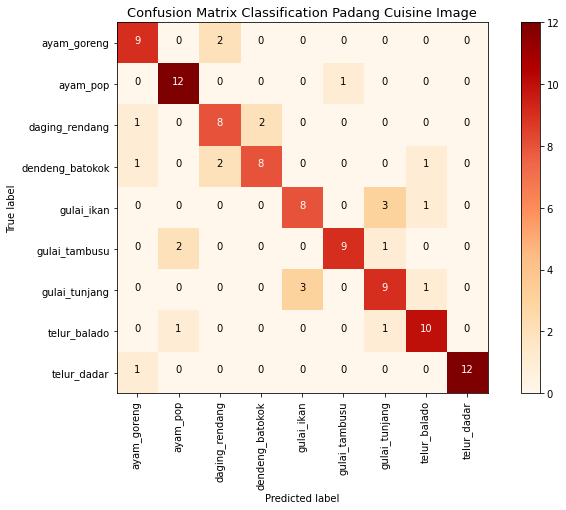

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix Classification Padang Cuisine Image',
                          cmap=plt.cm.OrRd):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    #print(cm)
    plt.rcParams['figure.figsize'] = (10.0, 7.0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 13)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_image_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_image_gen.class_indices)

# Testing Model with Data Test
After getting a model with good performance, it can be tested to recognize images of Padang cuisine.

In [ ]:
# Display class list or image labels

train_image_gen.class_indices

{'ayam_goreng': 0,
 'ayam_pop': 1,
 'daging_rendang': 2,
 'dendeng_batokok': 3,
 'gulai_ikan': 4,
 'gulai_tambusu': 5,
 'gulai_tunjang': 6,
 'telur_balado': 7,
 'telur_dadar': 8}

Saving daging_rendang (95).jpg to daging_rendang (95).jpg
daging_rendang (95).jpg


Prediction : Daging Rendang


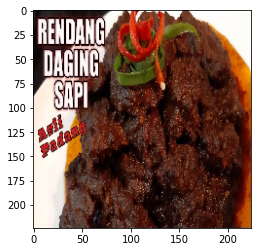

In [ ]:
# Testing Model with Data Test

from google.colab import files
import numpy as np
from keras.preprocessing import image
%matplotlib inline

 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  classes = np.argmax(classes)
  
  print(fn)
  print('\n')
  if classes==0:
    print('Prediction : Ayam Goreng')
  elif classes==1:
    print('Prediction : Ayam Pop')
  elif classes==2:
    print('Prediction : Daging Rendang')
  elif classes==3:
    print('Prediction : Dendeng Batokok')
  elif classes==4:
    print('Prediction : Gulai Ikan')
  elif classes==5:
    print('Prediction : Gulai Tambusu')
  elif classes==6:
    print('Prediction : Gulai Tunjang')
  elif classes==7:
    print('Prediction : Telur Balado')
  else:
    print('Prediction : Telur Dadar')

# Deployment

So that later it can be implemented or further developed, the model needs to be deployed first in HDF5, TFLite (Mobile) or TensorflowJS (Website) format.

In [ ]:
# save model in HDF5 format

model.save('HDF5_ModelVGG166_Classification_Padang.h5')

In [ ]:
# save model in TFLite format

import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('TFLite_ModelVGG166_Classification_Padang.tflite', 'wb') as f:
  f.write(tflite_model)